<img src="Agrupamento.png">

# 1. Classificação de empresas para investimento no longo prazo

[Por Hernandes Matias Junior](https://www.linkedin.com/in/hernandesmjunior/)

Utilizando dados históricos de empresas de capital aberto, este trabalho tem como objetivo prever se elas são ou não boas organizações para se investir no longo prazo.

A ilustração de capa é da Swell Consulting.

- Esta base de dados foi criada com as informações disponibizadas no site www.bastter.com;

- Para o acesso de tais informações, foi necessário comprar uma conta;

- Empresas com indisponibilidade de informações ficaram com seus respectivos campos vazios;

- Atributo situação (classe): este atributo recebeu valores que correspondem a boa, média ou ruim. Estas posições foram retiradas do site do www.tororadar.com e do aplicativo Dinheiro do Windows 10.

# 2. Importando as bibliotecas

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

import pickle

sns.set()

# 3. Carregando a base de dados

In [2]:
dataset = pd.read_excel(r"C:\Users\herna\OneDrive\Ciência de Dados para Negócios\Finanças\Classificação de empresas para investimentos no longo prazo\BDCompleto.xlsx")

In [3]:
dataset.head()

,Situação,Empresa,Segmento,Valor de M.,EV,Majoritar.,Pes. Fisicas,Categoria,LPA,LPA desconctado,...,FCO,FCI,FCF,FCT,FCL,FCI/LL,CAPEX,FCL CAPEX,CAPEX/LL,CAPEX/FCO
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,"Brasiliana Participaçoes (98,26%)",15969.0,alerta,0.57,0.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,NaN,"Aes Holdings Brasil ltda. (61,57%)",18681.0,dividendos,0.18,0.18,...,836.0,-126.0,-728.0,-18.0,710.0,0.68,-139.0,696.0,26.0,17.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,contour global do brasil participações ltda (9...,1898.0,alerta,0.16,0.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,"neoenergia s.a (87,84)",8.0,alerta,0.21,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,"admistradora fortaliza ltda (89,14%)",11290.0,crescimento moderado,0.60,0.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 70 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Situação             377 non-null    object 
 1   Empresa              377 non-null    object 
 2   Segmento             374 non-null    object 
 3   Valor de M.          319 non-null    float64
 4   EV                   285 non-null    float64
 5   Majoritar.           361 non-null    object 
 6   Pes. Fisicas         358 non-null    float64
 7   Categoria            348 non-null    object 
 8   LPA                  336 non-null    float64
 9   LPA desconctado      317 non-null    float64
 10  VPA                  339 non-null    float64
 11  P/L                  316 non-null    float64
 12  P/L descontado       311 non-null    float64
 13  EV/EBITDA            132 non-null    float64
 14  P/VPA                313 non-null    float64
 15  DPA                  141 non-null    flo

Verificando os valores faltantes

<AxesSubplot:>

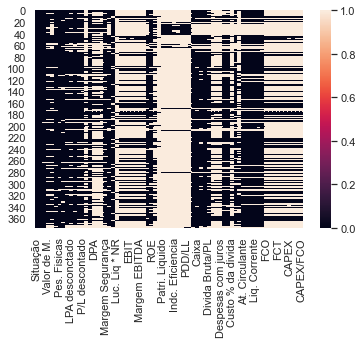

In [5]:
sns.heatmap(dataset.isnull())

In [6]:
pd.set_option('max_rows', None)
dataset.isnull().sum()

Situação                 0
Empresa                  0
Segmento                 3
Valor de M.             58
EV                      92
Majoritar.              16
Pes. Fisicas            19
Categoria               29
LPA                     41
LPA desconctado         60
VPA                     38
P/L                     61
P/L descontado          66
EV/EBITDA              245
P/VPA                   64
DPA                    236
Dividend Yield         236
Payout                 257
Margem Segurança        56
Rec. Liquida            51
Luc. Liquido            52
Luc. Liq * NR          326
Resultado Bruto        240
Margem Bruta           240
EBIT                   238
D&A                    239
EBITDA                 238
Margem EBITDA          239
Res. Financeiro        239
Margem Liquida          59
ROE                     49
ROA                    222
SSS                    363
Patri. Liquido         348
RIF                    348
Margem Bancaria        348
Indc. Eficiencia       357
I

Apagando atributos que possuem em sua maioria dados faltantes

In [7]:
dataset.drop(labels = ['EV/EBITDA', 'DPA', 'Dividend Yield', 'Payout', 'Luc. Liq * NR', 
                      'Resultado Bruto', 'Margem Bruta', 'EBIT', 'D&A', 'EBITDA', 
                      'Margem EBITDA', 'Res. Financeiro', 'ROA', 'SSS', 'RIF', 
                      'Margem Bancaria', 'Indc. Eficiencia', 'Indc. Basileia', 'PDD',
                      'PDD/LL', 'Equity Multi.', 'Div Liquida/EBITDA', 'Indice de Cobertura',
                      'Patri. Liquido', 'Despesas com juros', 'Custo % da divida', 'IPL', 'FCO', 'FCI',
                      'FCF', 'FCT', 'FCL', 'FCI/LL', 'CAPEX', 'FCL CAPEX', 'CAPEX/LL', 'CAPEX/FCO', 
                      'Majoritar.'],
             axis = 1, inplace = True)

In [8]:
dataset.shape

(377, 32)

In [9]:
pd.set_option('max_rows', None)
dataset.isnull().sum()

Situação             0
Empresa              0
Segmento             3
Valor de M.         58
EV                  92
Pes. Fisicas        19
Categoria           29
LPA                 41
LPA desconctado     60
VPA                 38
P/L                 61
P/L descontado      66
P/VPA               64
Margem Segurança    56
Rec. Liquida        51
Luc. Liquido        52
Margem Liquida      59
ROE                 49
Patri. Liquido.1    33
Caixa               41
Divida bruta        54
Divida Liquida      36
Divida Bruta/PL     81
EF                  66
ECP                 67
EM                  83
At. Circulante      60
Pas. Circulante     60
Caixa.1             60
Liq. Corrente       60
Liq. Imediata       61
Capital de giro     61
dtype: int64

In [10]:
pd.set_option('max_rows', 10)

Preenchendo os valores faltantes com a média

In [11]:
dataset.fillna(dataset.mean(), inplace=True)

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Situação          377 non-null    object 
 1   Empresa           377 non-null    object 
 2   Segmento          374 non-null    object 
 3   Valor de M.       377 non-null    float64
 4   EV                377 non-null    float64
 5   Pes. Fisicas      377 non-null    float64
 6   Categoria         348 non-null    object 
 7   LPA               377 non-null    float64
 8   LPA desconctado   377 non-null    float64
 9   VPA               377 non-null    float64
 10  P/L               377 non-null    float64
 11  P/L descontado    377 non-null    float64
 12  P/VPA             377 non-null    float64
 13  Margem Segurança  377 non-null    float64
 14  Rec. Liquida      377 non-null    float64
 15  Luc. Liquido      377 non-null    float64
 16  Margem Liquida    377 non-null    float64
 1

In [13]:
dataset.dropna(inplace=True)

# 4. Análise exploratória dos dados

<AxesSubplot:xlabel='Situação', ylabel='count'>

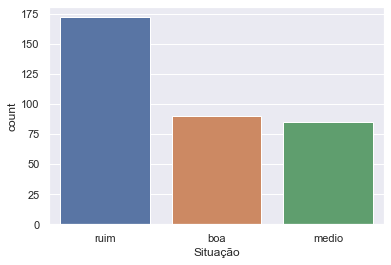

In [14]:
sns.countplot(x='Situação', data=dataset)

In [15]:
np.unique(dataset['Segmento'], return_counts = True)

(array(['acessorios', 'acessórios', 'agriculltura', 'agricultura',
        'agua e saneamento', 'alimentos', 'alimentos diversos',
        'aluguel de carros', 'armas e munições', 'artefatos de cobre',
        'artefatos de ferro e aço', 'automoveis e motocicletas',
        'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
        'café', 'calçados', 'carnes e derivados',
        'cervejas e refrigerantes', 'compressores e outros',
        'computadores e equipamentos', 'construção civil',
        'construção pesada', 'corretoras de seguros', 'edificações',
        'eletrodomesticos', 'eletrodomésticos', 'embalagens',
        'energia eletrica', 'engenharia construtiva',
        'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
        'exploração de imoveis', 'exploração de rodovias',
        'exploração, refino e distribuição', 'fertilizantes e defensivos',
        'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
        'holdings divers

Corrigindo os erros de digitação dos dados de 'Segmentos'

In [16]:
def corrige_segmento(texto):
  segmento = ''
  if texto == 'acessórios':
    segmento = 'acessorios'
  elif texto == 'agriculltura':
    segmento = 'agricultura'
  elif texto == 'alimentos diversos':
    segmento = 'alimentos'
  elif texto == 'eletrodomésticos':
    segmento = 'eletrodomesticos'
  elif texto == 'equipamentos e servicos':
    segmento = 'equipamentos'
  elif texto == 'mateial rodoviario':
    segmento = 'material rodoviario'
  elif texto == 'ser med hospit analises e diagnosticos' or texto == 'serv med hospit analises e disgnosticos' or texto == 'serv.med.hospit.analises e diagnosticos':
    segmento = 'hospitalar'
  elif texto == 'serviços de apoio e armazenamento':
    segmento = 'serviços de apoio e armazenagem'
  elif texto == 'serviços diversos s.a ctax':
    segmento = 'serviços diversos'
  elif texto == 'siderurgia':
    segmento = 'siderurgica'
  elif texto == 'soc. Credito e financiamento' or texto == 'soc credito e financiamento':
    segmento = 'credito'
  elif texto == 'tansporte aereo':
    segmento = 'transporte aereo'
  else:
    segmento = texto  

  return segmento

In [17]:
dataset['Segmento'] = dataset['Segmento'].apply(corrige_segmento)

In [18]:
np.unique(dataset['Segmento'], return_counts = True)

(array(['acessorios', 'agricultura', 'agua e saneamento', 'alimentos',
        'aluguel de carros', 'armas e munições', 'artefatos de cobre',
        'artefatos de ferro e aço', 'automoveis e motocicletas',
        'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
        'café', 'calçados', 'carnes e derivados',
        'cervejas e refrigerantes', 'compressores e outros',
        'computadores e equipamentos', 'construção civil',
        'construção pesada', 'corretoras de seguros', 'credito',
        'edificações', 'eletrodomesticos', 'embalagens',
        'energia eletrica', 'engenharia construtiva',
        'engenharia consultiva', 'equipamentos', 'equipamentos e serviços',
        'exploração de imoveis', 'exploração de rodovias',
        'exploração, refino e distribuição', 'fertilizantes e defensivos',
        'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
        'holdings diversificadas', 'hospitalar', 'hotelaria',
        'intermediação imobilia

Verificando os atributos de 'Categoria'

In [19]:
np.unique(dataset['Categoria'], return_counts=True)

(array(['alerta', 'crescimento', 'crescimento ', 'crescimento moderado',
        'dividendos', 'dividendos + crescimento'], dtype=object),
 array([243,  17,   1,  48,  36,   2], dtype=int64))

In [20]:
def corrige_categoria(texto):
    categoria = ''
    if texto == 'crescimento ':
        categoria = 'crescimento'
    else:
        categoria = texto
    return categoria

In [21]:
dataset['Categoria'] = dataset['Categoria'].apply(corrige_categoria)

In [22]:
np.unique(dataset['Categoria'], return_counts=True)

(array(['alerta', 'crescimento', 'crescimento moderado', 'dividendos',
        'dividendos + crescimento'], dtype=object),
 array([243,  18,  48,  36,   2], dtype=int64))

<AxesSubplot:xlabel='Categoria', ylabel='count'>

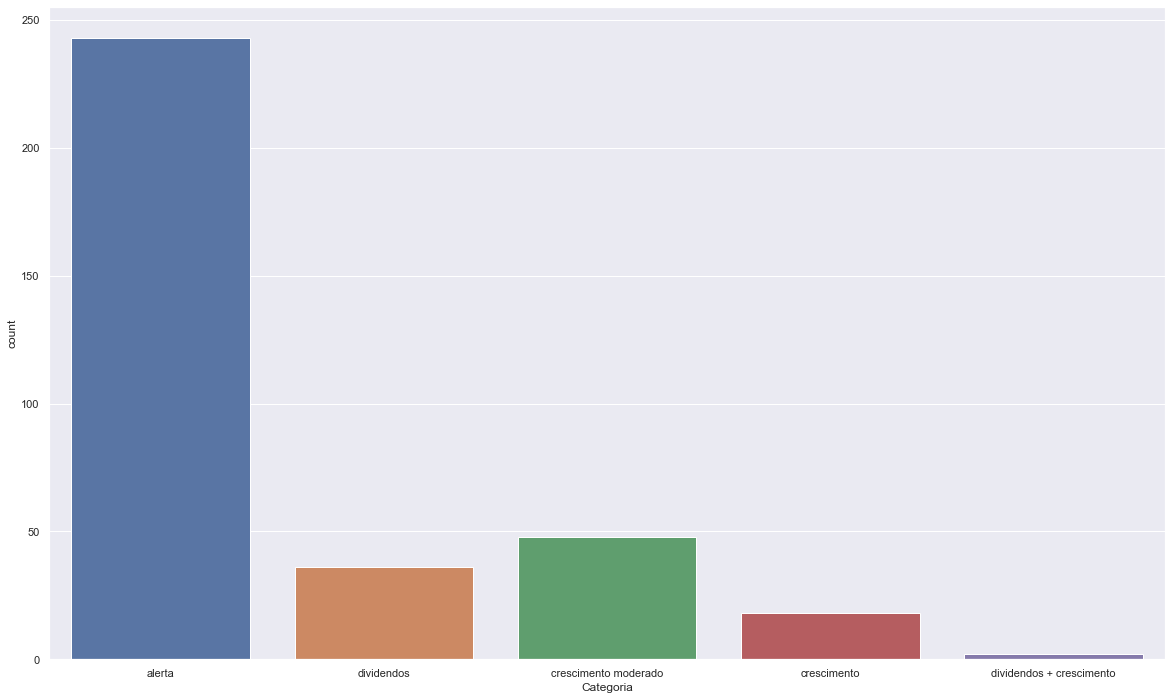

In [23]:
plt.figure(figsize=(20,12))
sns.countplot(x='Categoria', data=dataset)

In [24]:
dataset.describe()

,Valor de M.,EV,Pes. Fisicas,LPA,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,...,Divida Bruta/PL,EF,ECP,EM,At. Circulante,Pas. Circulante,Caixa.1,Liq. Corrente,Liq. Imediata,Capital de giro
count,3.470000e+02,3.470000e+02,3.470000e+02,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,3.470000e+02,...,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000,347.000000
mean,8.803913e+09,1.045164e+10,2.226064e+04,-7.862101,-9.044851,38.573753,11.139852,12.873580,1.532269,-8.271226e+03,...,1.763929,29.440006,38.957579,60.010565,3419.550616,2637.292240,1337.298603,2.068703,1.029286,772.802867
std,2.715437e+10,3.435244e+10,1.309892e+05,65.493749,64.456790,842.780784,85.152313,81.671064,2.677774,7.839801e+04,...,4.358198,145.468109,23.070951,412.828926,9719.816539,6880.722470,4362.187061,2.903694,2.563236,4676.082846
min,6.750600e+04,-2.623695e+07,1.000000e+00,-806.670000,-806.660000,-3804.860000,-866.700000,-312.210000,-15.600000,-1.079664e+06,...,0.000000,-1920.000000,0.000000,1.010000,0.000000,1.000000,0.000000,0.000000,0.000000,-34042.000000
25%,1.651804e+08,3.716960e+08,5.805000e+02,-2.030000,-5.680000,2.695000,-0.615000,-0.555000,0.475000,-8.590000e+02,...,0.505000,21.500000,22.000000,1.950000,232.000000,203.500000,40.500000,0.970000,0.170000,-1.500000
50%,1.362357e+09,3.583574e+09,1.773000e+03,0.130000,0.086000,9.470000,8.830000,9.580000,1.130000,-8.100000e+01,...,1.110000,31.000000,38.872065,3.030000,1307.000000,1022.000000,455.000000,1.660000,0.600000,243.000000
75%,8.596999e+09,1.021776e+10,6.354500e+03,1.185000,1.060000,22.565000,14.765000,14.840000,1.700000,-1.555000e+00,...,1.720811,52.500000,51.500000,43.680000,3259.653397,2536.304858,1274.283912,2.023817,0.999146,714.528481
max,2.866893e+11,4.998736e+11,1.803724e+06,200.660000,160.780000,14896.470000,861.240000,952.660000,24.760000,1.344470e+05,...,68.000000,1197.000000,100.000000,6723.190000,145907.000000,81167.000000,71664.000000,30.750000,30.500000,64740.000000


<ipython-input-25-4f943b435768>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset.hist(ax=eixo);


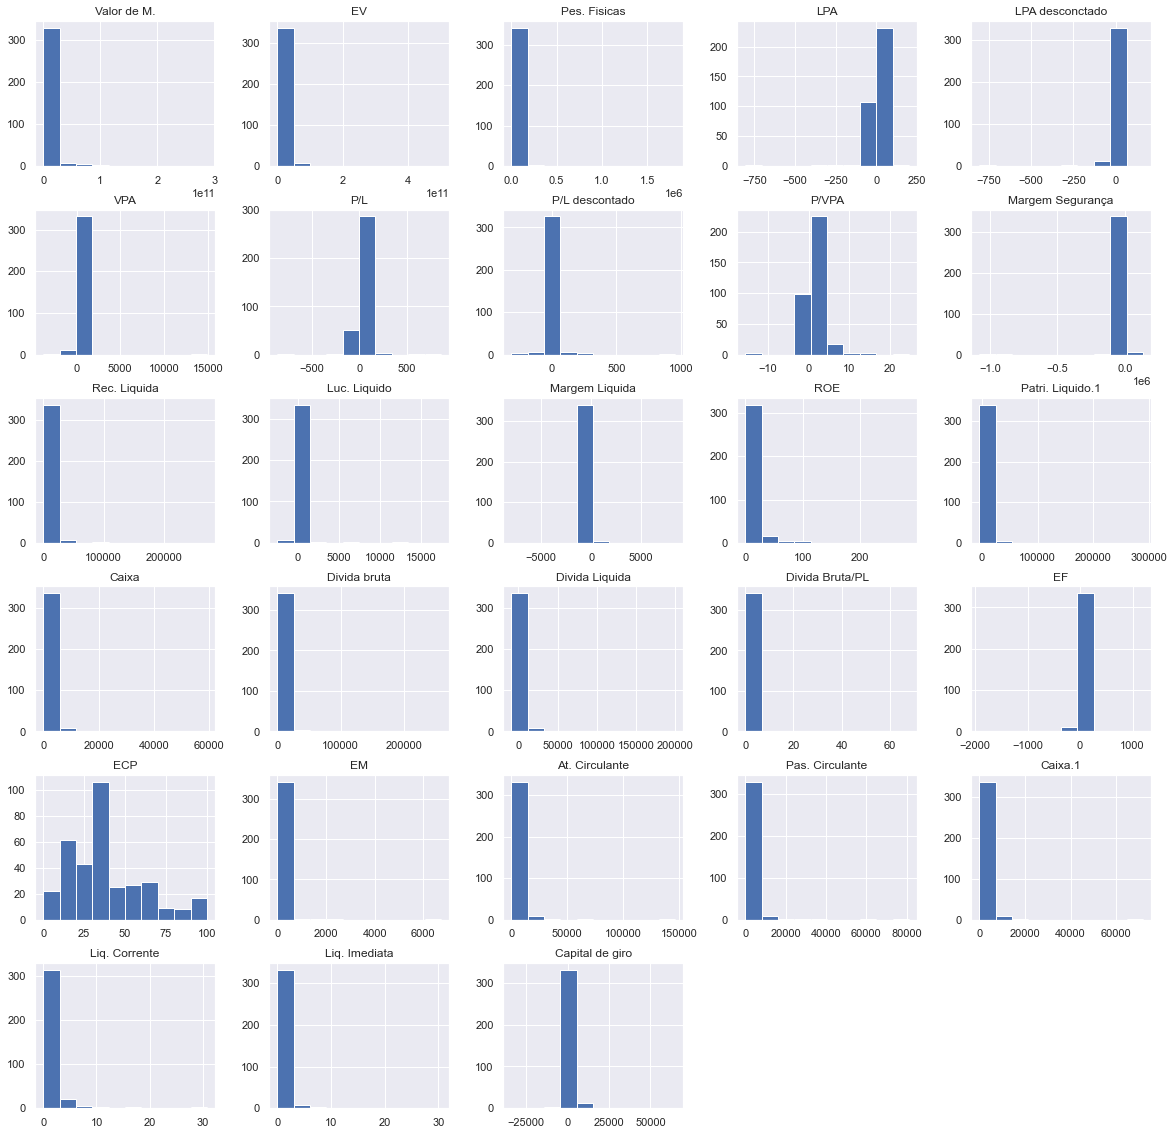

In [25]:
figura = plt.figure(figsize=(20,20))
eixo = figura.gca()
dataset.hist(ax=eixo);



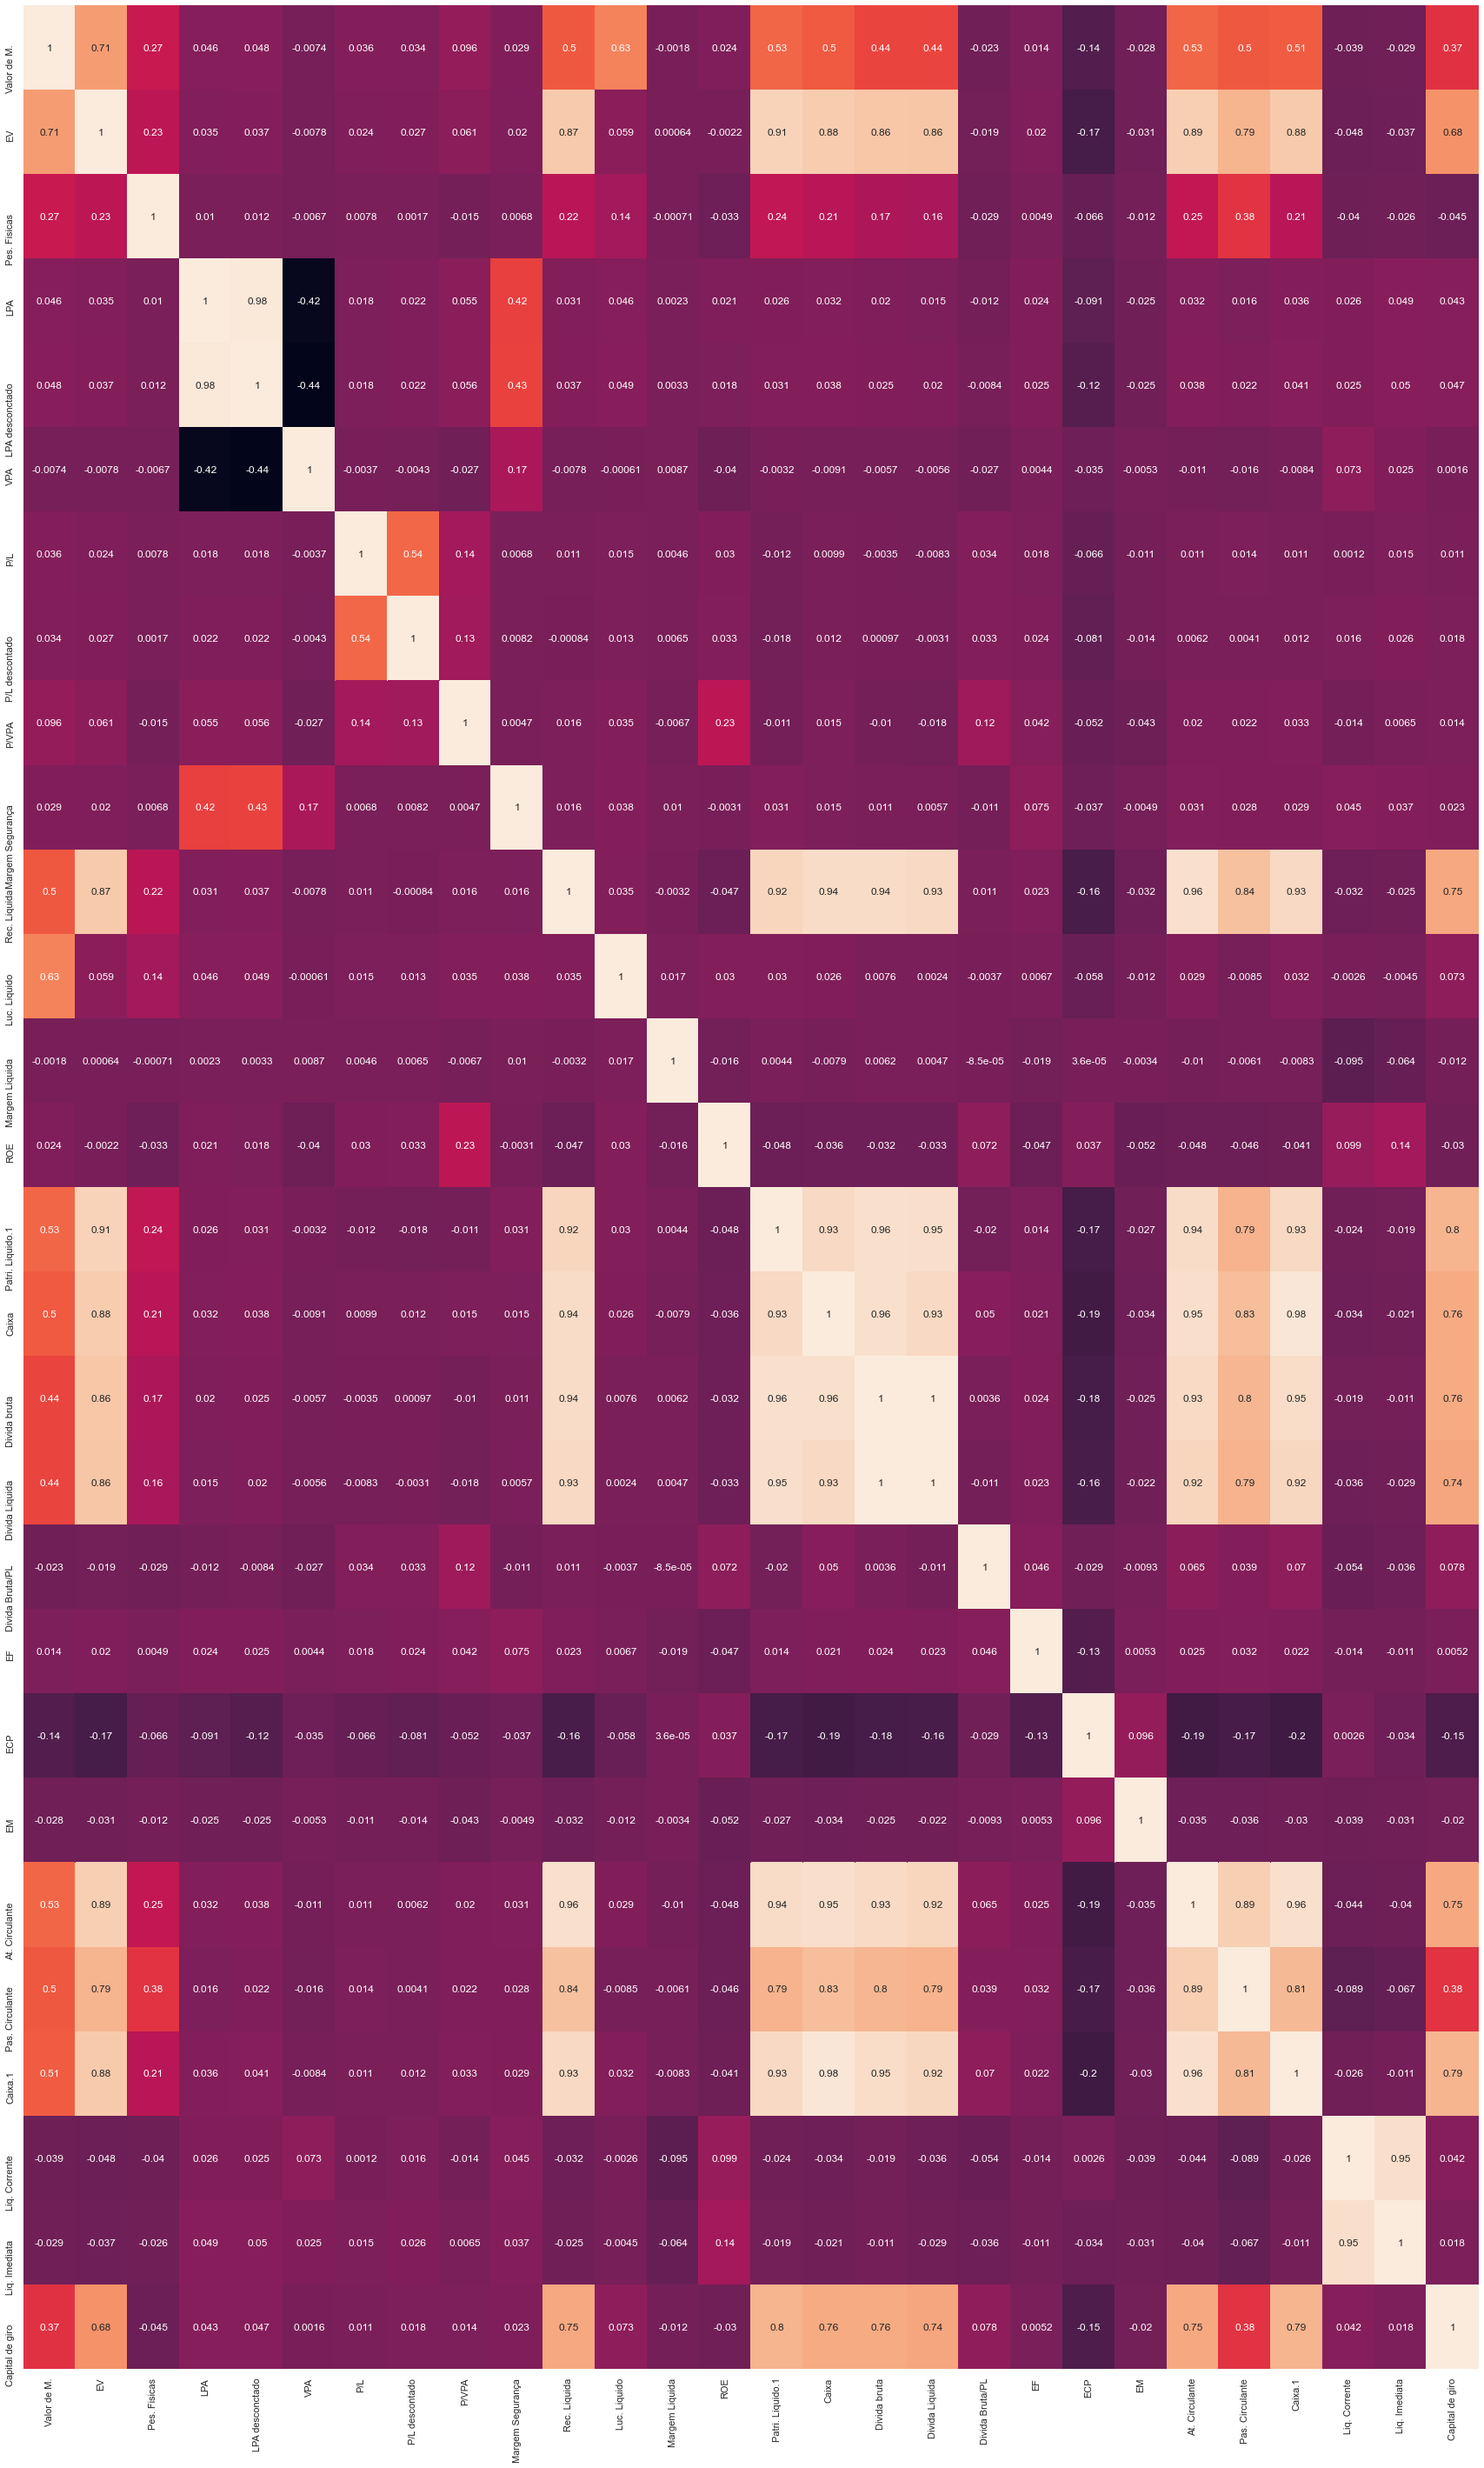

In [26]:
plt.figure(figsize=(30,50))
sns.heatmap(dataset.corr(), annot=True, cbar=False);

In [27]:
dataset.drop(['Rec. Liquida', 'Caixa'], axis=1, inplace=True)

In [28]:
dataset.drop(['Divida bruta', 'LPA', 'Caixa.1'], axis=1, inplace=True)

In [29]:
dataset.drop(['At. Circulante', 'Liq. Corrente'], axis = 1, inplace=True)

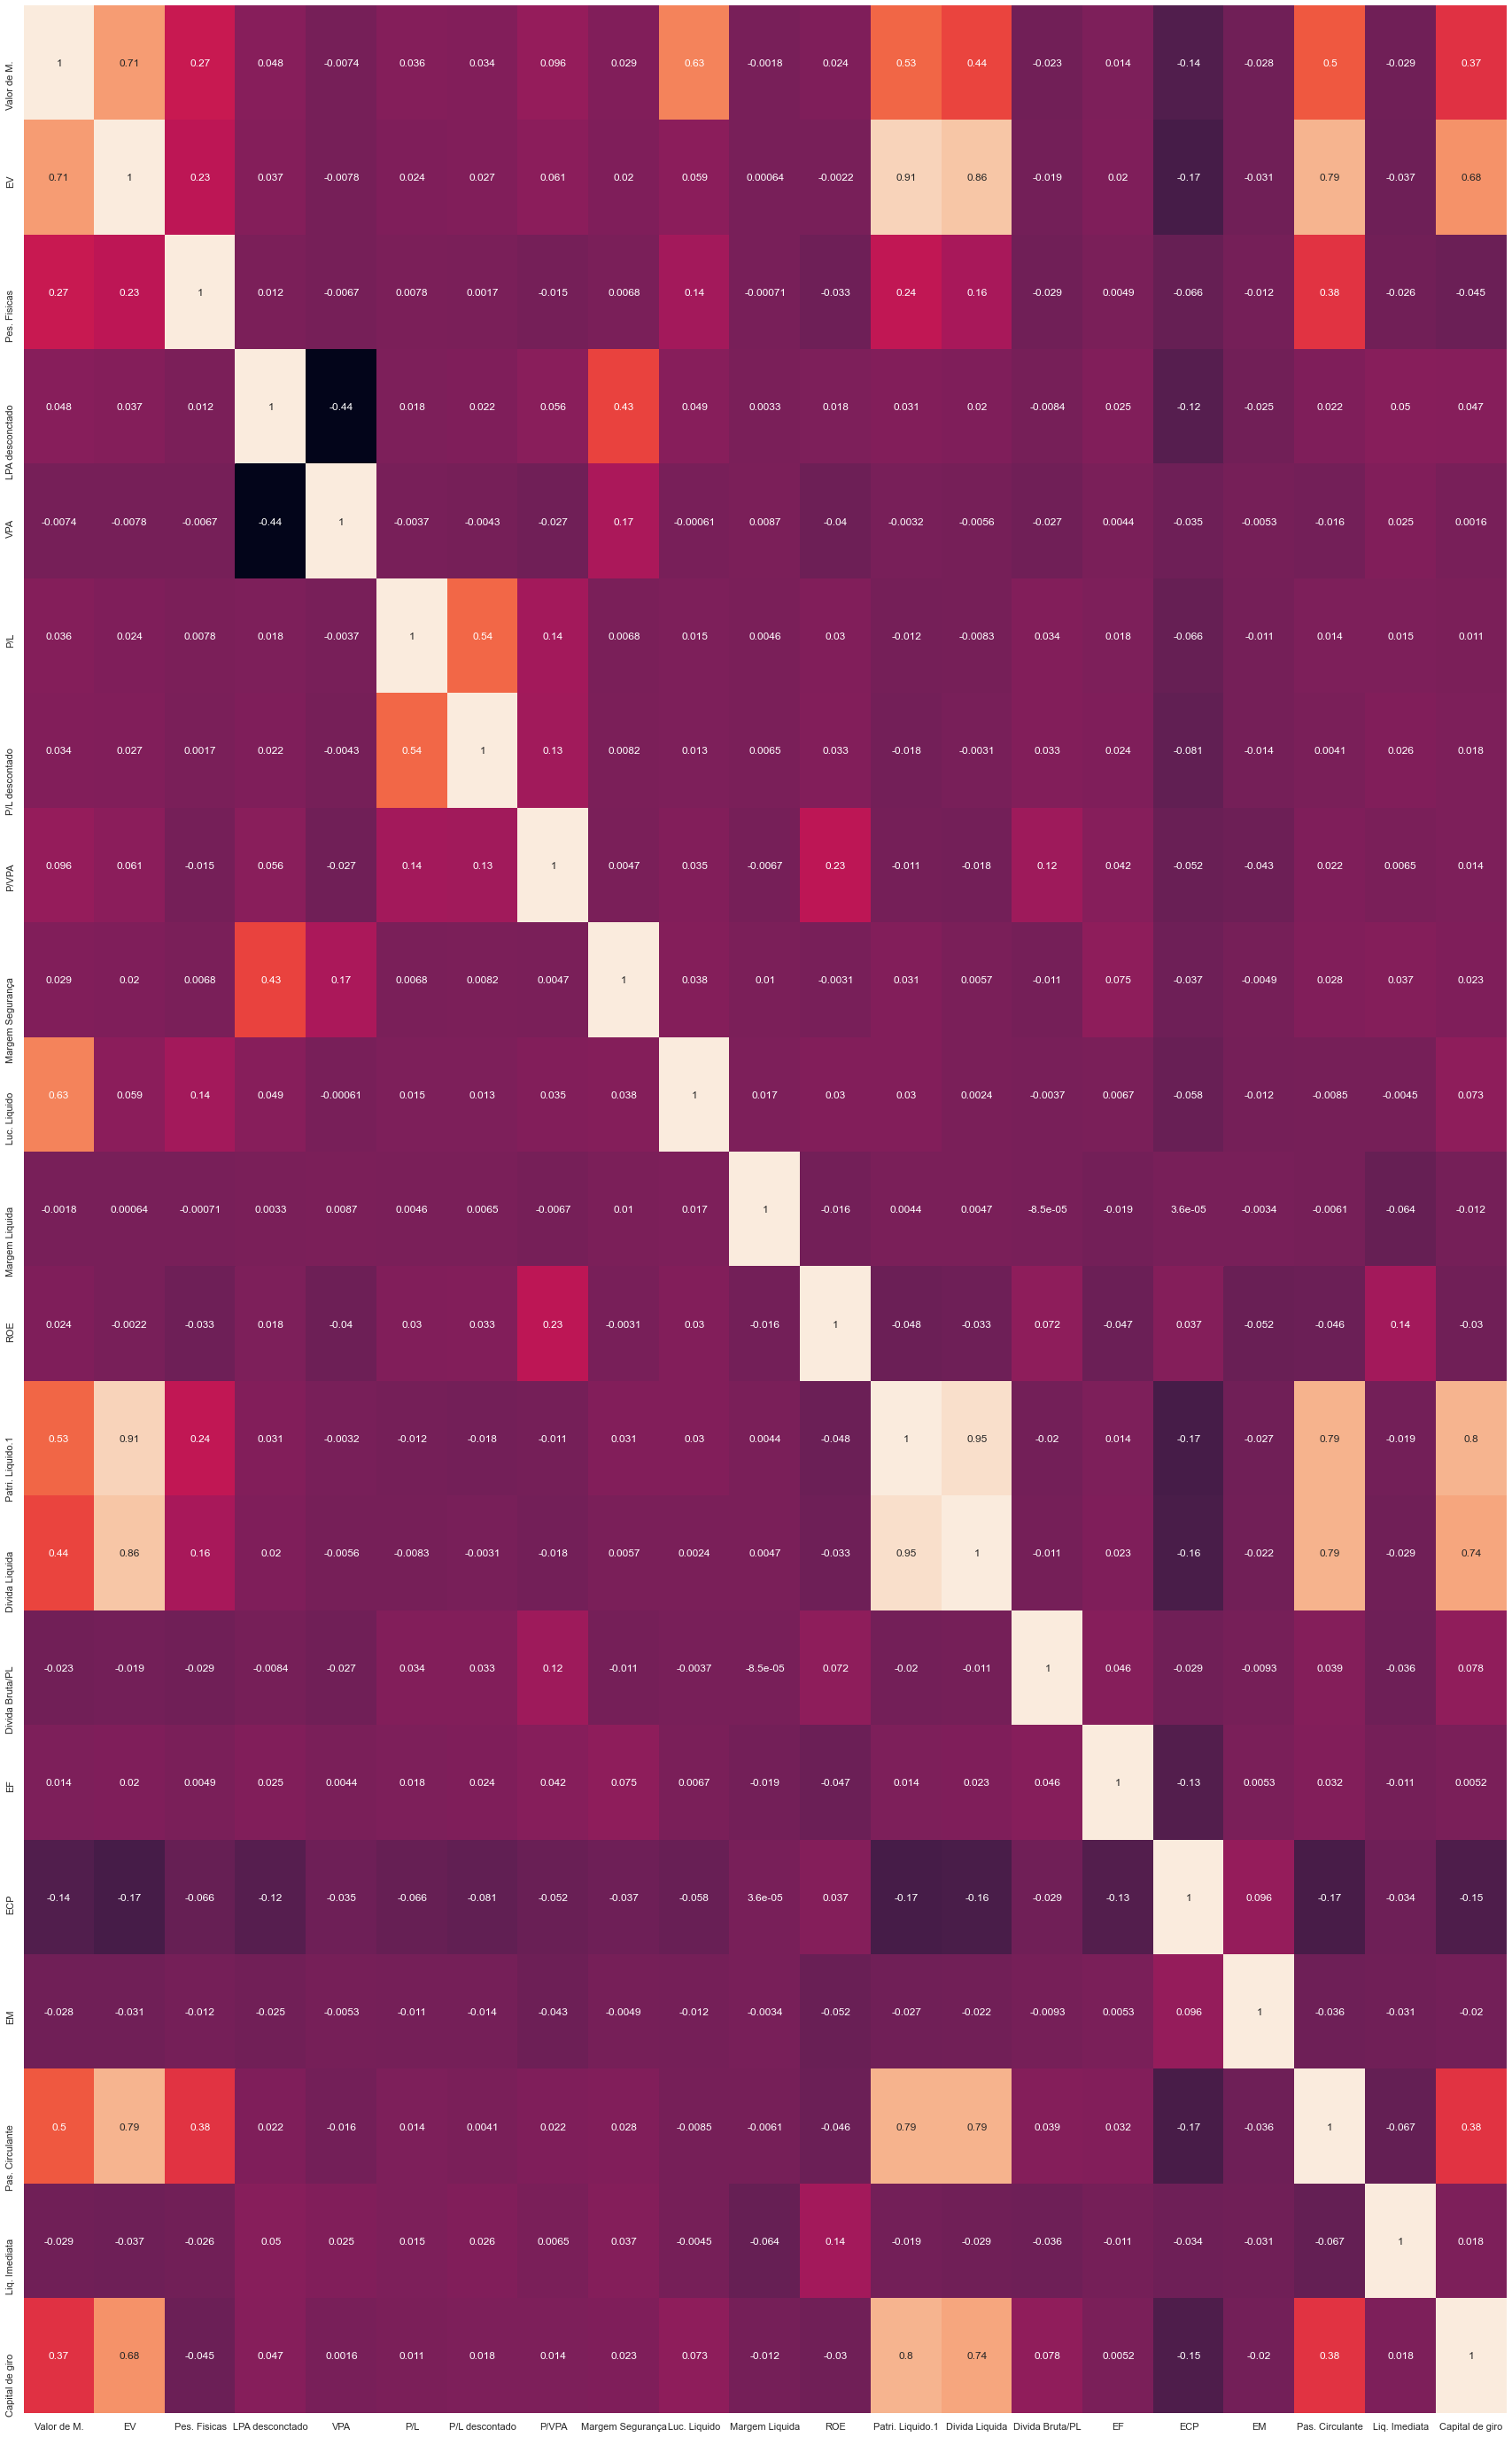

In [30]:
plt.figure(figsize=(30,50))
sns.heatmap(dataset.corr(), annot=True, cbar=False);

# 5. Variáveis dummy

Transformação das variáveis categóricas em variáveis dummy para posterior aplicação do algoritmo de machine learning.

In [31]:
dataset.head()

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA desconctado,VPA,P/L,...,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.0,alerta,0.56,36.03,24.71,...,20.66,2012.0,1567.00,0.860000,49.000000,11.000000,3.94,4508.0,0.12,102.0
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,1.021776e+10,18681.0,dividendos,0.18,0.80,14.92,...,37.00,1812.0,2459.00,1.720000,58.000000,15.000000,2.40,828.0,0.70,-52.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.0,alerta,0.15,2.07,31.55,...,25.00,48.0,-8.00,1.720811,30.548746,38.872065,1.24,8.0,1.13,4.0
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.0,alerta,0.20,1.23,21.69,...,22.00,78.0,-31.00,0.040000,5.250000,23.000000,1.15,7.0,6.00,67.0
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.0,crescimento moderado,0.60,10.42,5.65,...,6.00,721.0,-440.75,0.250000,30.548746,38.872065,1.01,6.0,0.50,0.0


In [32]:
y = dataset['Situação'].values
y

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

In [33]:
empresa = dataset['Empresa']
empresa

0                          aes elpa s.a 
1                         tiet aes tiete
2                          aflu afluente
3                        aflu afluente t
4                      rpad alfa holding
                     ...                
372                   whirlpool s.a whrl
373                 wilson sons ltd wson
374    wlm industria e comercia s.a sgas
375          zain participações s.a opzi
376                524 participações s.a
Name: Empresa, Length: 347, dtype: object

In [34]:
X_cat = dataset[['Segmento', 'Categoria']]
X_cat


,Segmento,Categoria
0,energia eletrica,alerta
1,energia eletrica,dividendos
2,energia eletrica,alerta
3,energia eletrica,alerta
4,bancos,crescimento moderado
...,...,...
372,eletrodomesticos,dividendos
373,serviços de apoio e armazenagem,alerta
374,material de transporte,alerta
375,outros,alerta


In [35]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
X_cat.shape

(347, 90)

In [37]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
343,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
# salvando o dataset original

dataset_original = dataset.copy()

In [39]:
# após a criação das variáveis dummies, excluimos as variáveis categóricas

dataset.drop(['Segmento', 'Categoria', 'Situação', 'Empresa'], axis=1, inplace=True)

dataset

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,ROE,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,...,20.660000,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,...,37.000000,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,...,25.000000,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,...,22.000000,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,...,6.000000,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,...,24.000000,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000
373,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,...,11.000000,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000
374,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,...,5.000000,452.000000,-135.000000,1.720811,30.548746,38.872065,1.180000,59.000000,0.780000,120.000000
375,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,...,18.404238,4.000000,-2.000000,1.720811,30.548746,38.872065,62.646871,1.000000,1.000000,3.000000


In [40]:
# concatenando as variáveis dummies X_cat

dataset.index = X_cat.index

dataset.index, X_cat.index

(RangeIndex(start=0, stop=347, step=1), RangeIndex(start=0, stop=347, step=1))

In [41]:
dataset = pd.concat([dataset, X_cat], axis=1)
dataset

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,80,81,82,83,84,85,86,87,88,89
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
343,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
344,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
345,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# 6. Normalização

Utilizando uma operação matemática para colocar os valores em uma mesma escala. Dessa forma, o algoritmo vai interpretar as variáveis como tendo a mesma importância.

In [42]:
scaler = MinMaxScaler()

dataset_normalizado = scaler.fit_transform(dataset)

In [43]:
dataset_normalizado

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [44]:
X = dataset_normalizado.copy() # dados com que o algoritmo será treinado
X

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [45]:
y

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

# 7. Aplicação e avaliação dos algoritmos

In [46]:
(347 + 3) / 2   # neurônios = 347 observações e 3 saídas

175.0

In [47]:
resultados_forest = []
resultados_neural = []
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv = kfold)
  resultados_forest.append(scores.mean())

  network = MLPClassifier(hidden_layer_sizes=(175, 175))
  scores = cross_val_score(network, X, y, cv = kfold)
  resultados_neural.append(scores.mean())

resultados_forest = np.array(resultados_forest)
resultados_neural = np.array(resultados_neural)

C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multi

C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\herna\anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [48]:
resultados_forest.mean(), resultados_neural.mean() # visualizando a média de resultados dos dois algoritmos

(0.6415322128851542, 0.5413025210084034)

#### O algoritmo Random Forest apresentou uma acurária maior que a Rede Neural.

# 8. Avaliação com base de treinamento e teste

In [56]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.3)

In [57]:
random_forest = RandomForestClassifier()
random_forest.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [58]:
previsoes = random_forest.predict(X_teste)

In [59]:
previsoes

array(['ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'ruim',
       'boa', 'boa', 'medio', 'ruim', 'ruim', 'boa', 'ruim', 'boa', 'boa',
       'medio', 'ruim', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'medio', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa',
       'ruim', 'medio', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'medio', 'ruim', 'ruim', 'boa', 'ruim', 'boa', 'medio', 'ruim',
       'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'boa', 'ruim', 'ruim', 'boa', 'ruim',
       'ruim', 'ruim', 'ruim', 'ruim', 'ruim', 'boa', 'boa', 'boa',
       'ruim', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'medio', 'ruim',
       'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'boa', 'boa', 'ruim',
       'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'boa', 'medio', 'ruim'],
      dtype=object)

In [60]:
y_teste

array(['ruim', 'ruim', 'ruim', 'medio', 'medio', 'ruim', 'ruim', 'ruim',
       'boa', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'medio',
       'boa', 'medio', 'ruim', 'ruim', 'boa', 'ruim', 'medio', 'ruim',
       'ruim', 'boa', 'ruim', 'medio', 'medio', 'medio', 'medio', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'medio', 'boa', 'ruim', 'ruim',
       'medio', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'medio',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'medio', 'medio', 'boa', 'boa', 'ruim', 'boa', 'medio', 'ruim',
       'boa', 'medio', 'ruim', 'ruim', 'boa', 'ruim', 'boa', 'boa',
       'medio', 'ruim', 'boa', 'ruim', 'ruim', 'medio', 'medio', 'medio',
       'medio', 'ruim', 'medio', 'ruim', 'ruim', 'boa', 'ruim', 'boa',
       'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa', 'boa', 'boa',
       'ruim', 'boa', 'boa', 'ruim', 'medio', 'ruim', 'boa', 'medio',
       'ruim'], dtype=object)

In [61]:
accuracy_score(y_teste, previsoes)

0.6476190476190476

In [62]:
cm = confusion_matrix(y_teste, previsoes)
cm

array([[15,  4,  6],
       [ 8,  5, 15],
       [ 2,  2, 48]], dtype=int64)

In [64]:
random_forest.classes_ # identificando o índice das classes

array(['boa', 'medio', 'ruim'], dtype=object)

<AxesSubplot:>

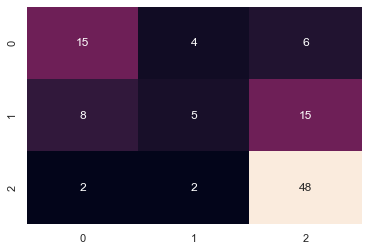

In [63]:
sns.heatmap(cm, annot=True, cbar=False)

O algoritmo teve dificuldade e acabou errando as empresas classificadas como "boas", mas acertou a grande maioria das vezes as empresas que são "ruim".

In [65]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         boa       0.60      0.60      0.60        25
       medio       0.45      0.18      0.26        28
        ruim       0.70      0.92      0.79        52

    accuracy                           0.65       105
   macro avg       0.58      0.57      0.55       105
weighted avg       0.61      0.65      0.60       105



Em geral, a intenção do investidor é saber se a empresa é "boa" ou "ruim" para se investir, o que faz com que não seja tão interessante a classificação "médio". Caso seja retirada essa classificação, a acurácia do algoritmo aumenta, pois ele apresentou resultado interessante para as outras duas categorias, levando-se em consideração a base de dados.

### Prevendo um registro

In [67]:
X_teste[0].reshape(1,-1)

array([[2.14864221e-03, 3.68533211e-03, 4.98967968e-04, 8.32888861e-01,
        2.03618138e-01, 5.00329873e-01, 2.45124005e-01, 4.02130823e-01,
        8.88744110e-01, 1.23712894e-01, 4.87558228e-01, 5.60557755e-02,
        1.73940911e-02, 4.65004540e-02, 2.04411765e-02, 6.35226179e-01,
        6.90000000e-01, 3.55539423e-04, 1.59303156e-02, 9.83606557e-04,
        3.54244700e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [68]:
random_forest.predict(X_teste[0].reshape(1,-1))

array(['ruim'], dtype=object)

#### Verificando quais as variáveis mais relevantes para o algoritmo

In [69]:
random_forest.feature_importances_

array([6.55151745e-02, 3.97294225e-02, 4.48182654e-02, 6.51972429e-02,
       4.02849580e-02, 3.83739855e-02, 3.49831168e-02, 4.62736708e-02,
       4.86461724e-02, 5.40708995e-02, 4.20582778e-02, 3.27429564e-02,
       4.33273971e-02, 3.35995785e-02, 3.23858504e-02, 2.66125648e-02,
       3.38465710e-02, 3.69209650e-02, 3.60800512e-02, 3.12952596e-02,
       3.55343277e-02, 7.69441206e-04, 5.44921839e-03, 1.47535174e-03,
       0.00000000e+00, 3.63538109e-04, 2.61553878e-05, 4.00715872e-04,
       5.58999583e-04, 4.84563473e-04, 8.95780564e-04, 2.91884598e-03,
       0.00000000e+00, 2.44636258e-03, 1.16479489e-05, 7.04428982e-04,
       4.32116817e-03, 0.00000000e+00, 1.16056014e-05, 2.44603523e-04,
       0.00000000e+00, 5.14328149e-04, 0.00000000e+00, 6.11963577e-04,
       2.57568848e-03, 1.56688047e-03, 1.19581183e-03, 7.02301716e-03,
       0.00000000e+00, 2.39560040e-04, 3.66799564e-04, 2.01081564e-04,
       2.39386846e-03, 4.18879180e-04, 7.33289388e-04, 8.96623945e-05,
      

In [70]:
np.argmax(random_forest.feature_importances_)

0

In [71]:
for nome, importancia in zip(dataset.columns, random_forest.feature_importances_):
    print(nome, ' = ', importancia)

Valor de M.  =  0.06551517446276206
EV  =  0.03972942252902343
Pes. Fisicas  =  0.0448182653955894
LPA desconctado  =  0.06519724286645169
VPA  =  0.04028495795860625
P/L  =  0.03837398554124681
P/L descontado  =  0.034983116776653854
P/VPA  =  0.04627367075830875
Margem Segurança  =  0.04864617237916122
Luc. Liquido  =  0.05407089954861062
Margem Liquida  =  0.04205827778172851
ROE  =  0.03274295644875156
Patri. Liquido.1  =  0.043327397051232626
Divida Liquida  =  0.03359957851701777
Divida Bruta/PL  =  0.03238585043523101
EF  =  0.026612564800298968
ECP  =  0.03384657095955149
EM  =  0.03692096498315076
Pas. Circulante  =  0.036080051193253096
Liq. Imediata  =  0.03129525963729972
Capital de giro  =  0.03553432770309018
0  =  0.0007694412063222386
1  =  0.0054492183862343765
2  =  0.0014753517369560463
3  =  0.0
4  =  0.00036353810858933723
5  =  2.6155387760400638e-05
6  =  0.0004007158719956178
7  =  0.0005589995826352378
8  =  0.0004845634727320819
9  =  0.0008957805643405545
10 

In [72]:
caracteristicas = dataset.columns

importancias = random_forest.feature_importances_

In [73]:
indices = np.argsort(importancias)
indices

array([ 32,  42,  40,  91,  48,  68,  37,  24,  76,  70,  82,  69,  74,
        61, 101,  38,  34,  26,  95,  55, 103,  86, 105,  81,  60,  65,
        51,  49,  39,  66,  77,  62,  64,  25,  50,  75,  27,  53,  83,
        29,  87, 104,  41,  88,  28,  67,  43,  94,  96,  57,  93,  35,
        54,  21,  80,  85,  30,  59,  84, 102,  73,  90,  99,  46, 100,
        23,  45,  58,  89,  97,  79,  52,  33,  78,  44,  98,  63,  31,
        56, 110,  92,  72,  36, 107,  22, 109,  71,  47, 108,  15, 106,
        19,  14,  11,  13,  16,   6,  20,  18,  17,   5,   1,   4,  10,
        12,   2,   7,   8,   9,   3,   0], dtype=int64)

Text(0.5, 0, 'Importâncias')

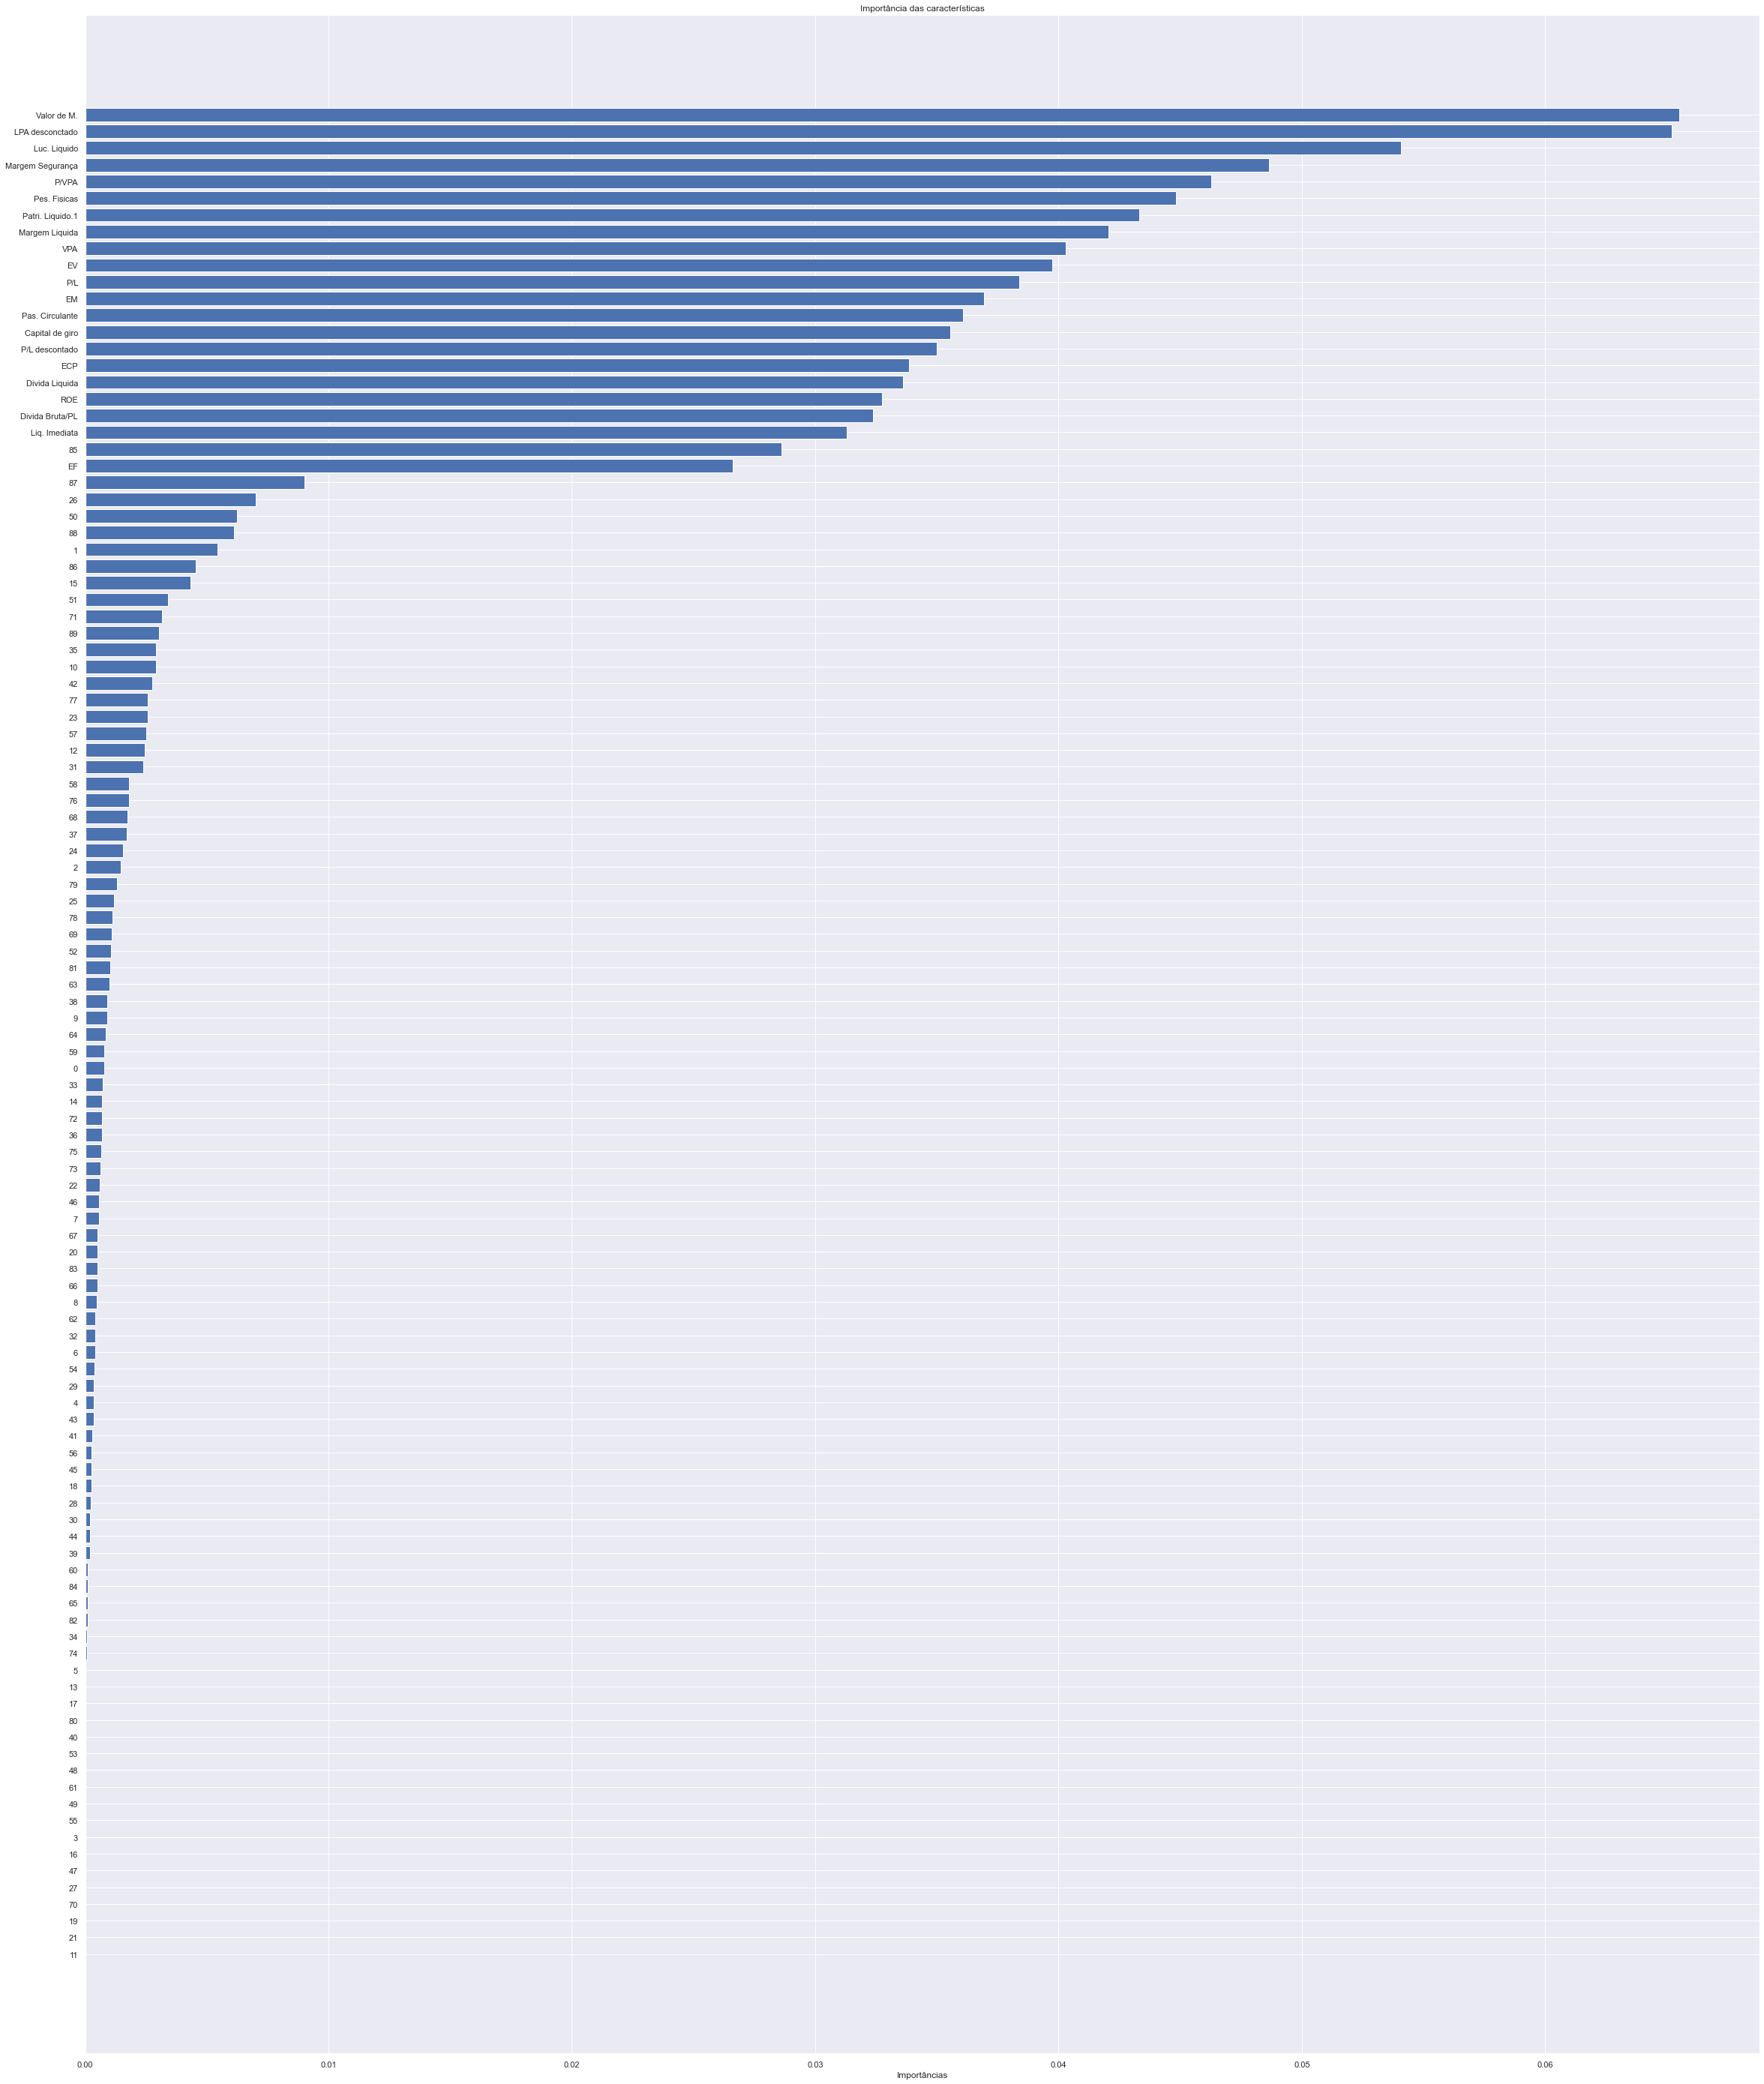

In [75]:
plt.figure(figsize=(40,50))
plt.title('Importância das características')
plt.barh(range(len(indices)), importancias[indices], color='b', align='center')
plt.yticks(range(len(indices)), [caracteristicas[i] for i in indices])
plt.xlabel('Importâncias')

#### Salvando o arquivo com as variáveis

In [77]:
with open('bases_classificacao.pkl', 'wb') as f:
    pickle.dump([dataset, dataset_original, X, y, empresa, scaler], f)